# <u> CLUSTERING PROJECT </u>
<font color=blue>SAUMYA ACHANTANI</font><br>
<font color=blue>18CSU194</font>

# CREDIT CARD CUSTOMER SEGMENTATION PROBLEM STATEMENT
Objective:-Segment credit card holders based on the usage of creditcard so that they can analyse the pattern and behaviour of customer to improve the revenue.

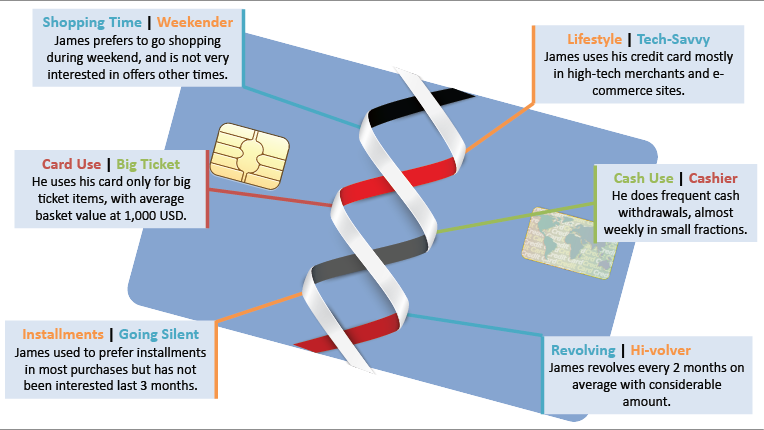

In [1]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
#reading input file
df=pd.read_csv('dataset.csv')

The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Attribute Information :
CUST_ID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFF_PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES : Amount of purchase done in installment

CASH_ADVANCE : Cash in advance given by the user

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASES_TRX : Numbe of purchase transactions made

CREDIT_LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [3]:
#displaying first 5 rows
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
#datatypes of columns in dataset
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

# DATA PRE-PROCESSING

In [5]:
#statistical summary of dataset
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
#number of rows and columns
print("Number of rows in dataset : ",df.shape[0])
print("Number of columns in dataset :",df.shape[1])

Number of rows in dataset :  8950
Number of columns in dataset : 18


In [7]:
#Look to see if there are any null values
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<font color=blue>There are 2 columns with null values.
Hence,we will perform imputation i.e we will replace null values with median</font>

In [8]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].median()
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].median()
#dropping customer ID column because it is of string datatype
df.drop(columns='CUST_ID',inplace=True)

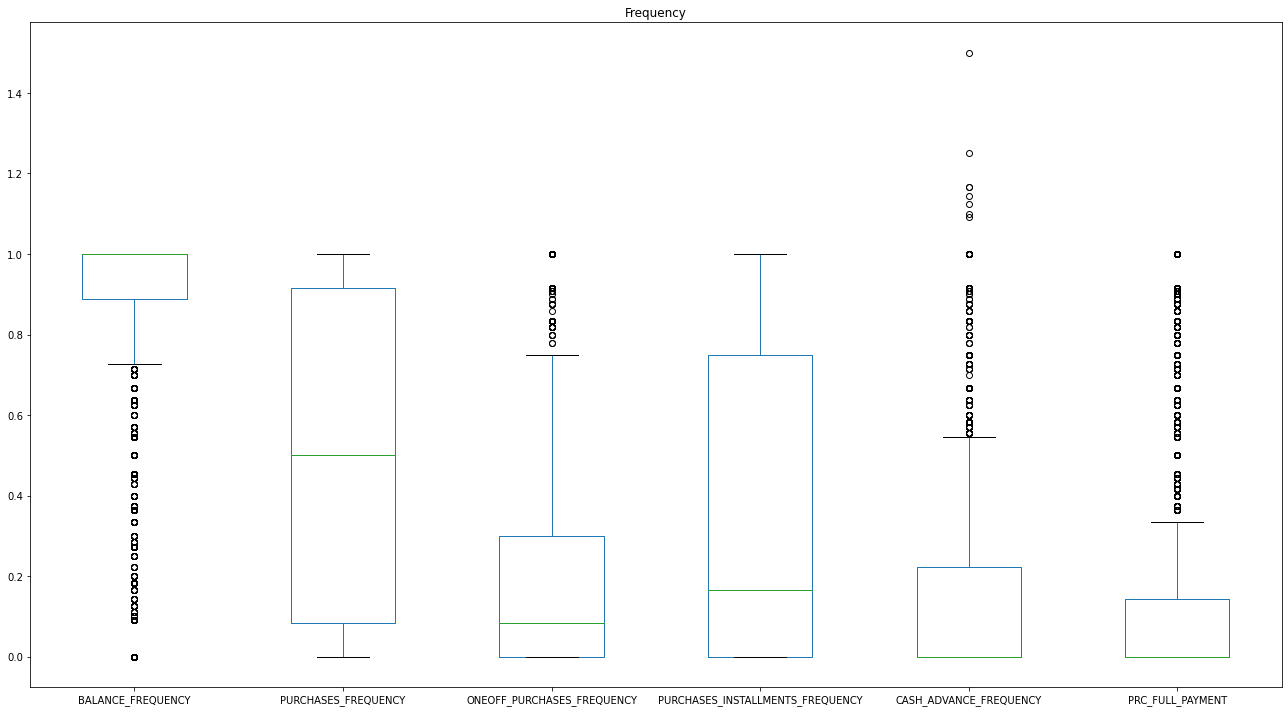

In [9]:
df[['BALANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
'PRC_FULL_PAYMENT']].plot.box(figsize=(18,10),title='Frequency',legend=True);
plt.tight_layout()
# We have data on Cash_advance_frequency that is wrong because>1 frequency. 

In [10]:
df.loc[(df['CASH_ADVANCE_FREQUENCY']>1)]
# we have 8 records for which the frequency is higher that 1. 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
681,5656.069801,1.000000,362.36,362.36,0.0,7240.433194,0.250000,0.250000,0.0,1.250000,12,2,8000.0,683.421497,2036.877611,0.0,8
1626,2876.009336,1.000000,152.61,152.61,0.0,3719.650168,0.333333,0.333333,0.0,1.166667,24,2,4000.0,248.342971,584.926336,0.0,6
2555,5906.184924,1.000000,141.80,141.80,0.0,1651.286918,0.125000,0.125000,0.0,1.125000,12,2,10000.0,933.969974,919.289675,0.0,8
2608,7801.511533,1.000000,231.40,231.40,0.0,4109.465221,0.100000,0.100000,0.0,1.100000,20,3,13500.0,1593.617739,1522.496755,0.0,10
3038,3846.742530,1.000000,0.00,0.00,0.0,1932.460679,0.000000,0.000000,0.0,1.500000,18,0,5600.0,496.245836,538.346874,0.0,6
3253,5709.486507,0.833333,0.00,0.00,0.0,2794.326341,0.000000,0.000000,0.0,1.166667,10,0,6000.0,550.513331,1299.463370,0.0,6
8055,1917.895730,1.000000,285.07,285.07,0.0,6084.858872,0.363636,0.363636,0.0,1.090909,28,6,3000.0,5692.682993,556.449635,0.0,11
8365,3857.562230,1.000000,0.00,0.00,0.0,2127.213754,0.000000,0.000000,0.0,1.142857,26,0,5000.0,617.508991,538.396872,0.0,7


In [11]:
# dropping the records with frequency higher that 1
df = df[(df[['CASH_ADVANCE_FREQUENCY']] <= 1).all(axis=1)]

# EXPLORATORY DATA ANALYSIS

Text(0.5, 1.0, 'HEAT MAP')

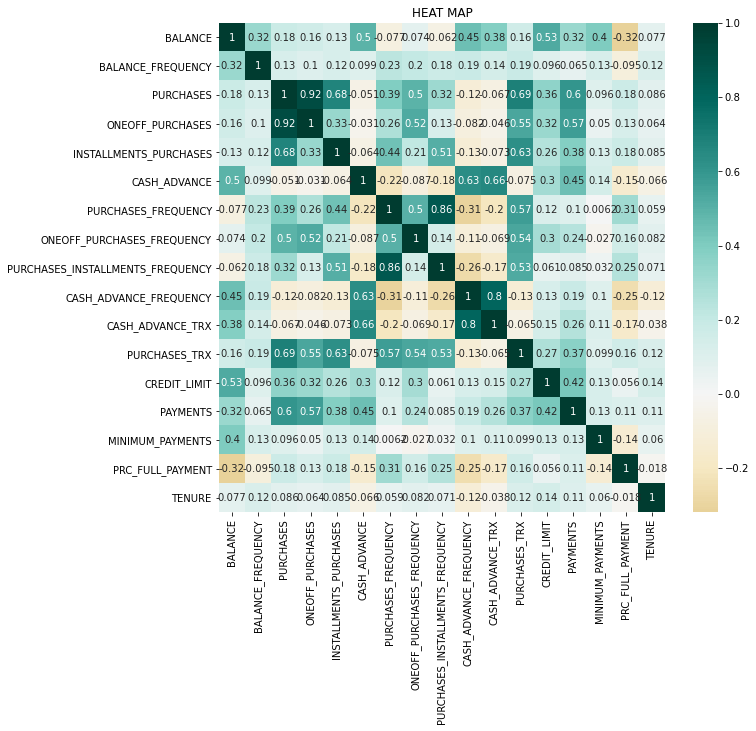

In [12]:
#Finding correlation between all attributes of dataset
fig, ax = plt.subplots(figsize=(10,9))
sns.heatmap(df.corr(), center=0, cmap='BrBG', annot=True)
ax.set_title('HEAT MAP')

INFERENCE FROM HEAT MAP:-<br>
1.ONE OFF PURCHASES AND PURCHASES HAVE <u>MAXIMUM POSITIVE CORRELATION</u><br>
2.PRC FULL PAYMENT AND BALANCE HAVE <u> MAXIMUM NEGATIVE CORRELATION

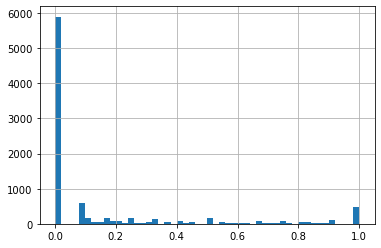

In [13]:
df['PRC_FULL_PAYMENT'].hist(bins=50)
#there are only some users who pay 100% of the payment 

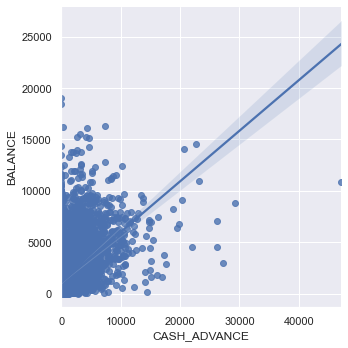

In [14]:
sns.set()
sns.lmplot(x="CASH_ADVANCE", y="BALANCE", data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000780742FFD0>]],
      dtype=object)

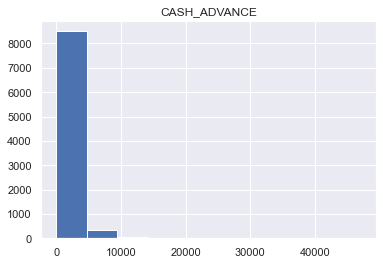

In [15]:
df.hist(['CASH_ADVANCE'])
#It can be seen that most of the people do not prefer to pay cash in advance.

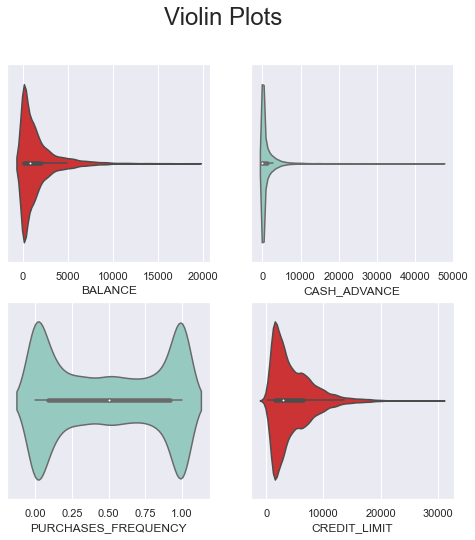

In [16]:
#4. violin plot
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
plt.suptitle('Violin Plots',fontsize=24)
sns.violinplot(x="BALANCE", data=df,ax=ax[0,0],palette='Set1')
sns.violinplot(x="CASH_ADVANCE", data=df,ax=ax[0,1],palette='Set3')
sns.violinplot (x ='PURCHASES_FREQUENCY', data=df, ax=ax[1,0], palette='Set3')
sns.violinplot(x='CREDIT_LIMIT', data=df, ax=ax[1,1],palette='Set1')
plt.show()

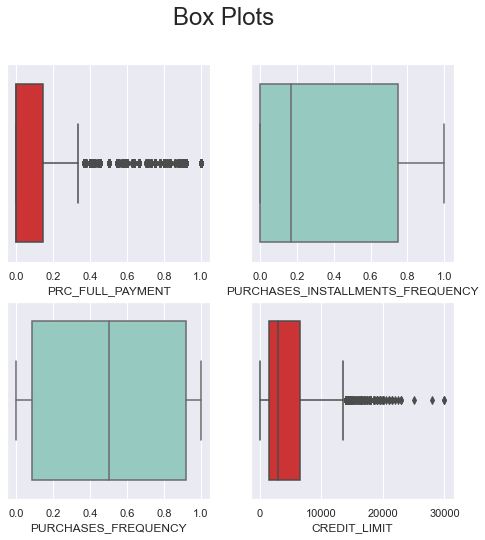

In [17]:
fig,ax = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
plt.suptitle('Box Plots',fontsize=24)
sns.boxplot(x="PRC_FULL_PAYMENT", data=df,ax=ax[0,0],palette='Set1')
sns.boxplot(x="PURCHASES_INSTALLMENTS_FREQUENCY", data=df,ax=ax[0,1],palette='Set3')
sns.boxplot (x ='PURCHASES_FREQUENCY', data=df, ax=ax[1,0], palette='Set3')
sns.boxplot(x='CREDIT_LIMIT', data=df, ax=ax[1,1],palette='Set1')
plt.show()

In [18]:
#bringing the attributes on a common scale
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
de = standard_scaler.fit_transform(df)

# <font color=blue>CLUSTERING

# ELBOW METHOD:TO FIND OPTIMAL NUMBER OF CLUSTERS

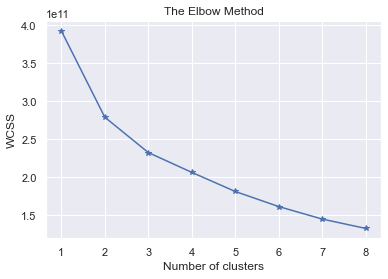

In [20]:

from sklearn.cluster import KMeans
wcss = [] #this means inertia or intra cluster distance
for i in range(1, 9):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=400, n_init=12)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_) #inertia=intra cluster distance
    
#ploting graph
plt.plot(range(1, 9), wcss,marker='*')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [21]:
from sklearn.metrics import silhouette_score  
silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init=10)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)

Text(0.5, 1.0, 'Silhouette Coefficients')

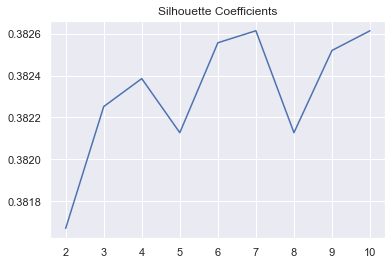

In [22]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.title('Silhouette Coefficients')
#The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.
#The score is higher when clusters are dense and well separated

K=4 is optimal number for cluster.

# Principal Component Analysis:-
Dimensionality-reduction method, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Text(0, 0.5, 'PC2')

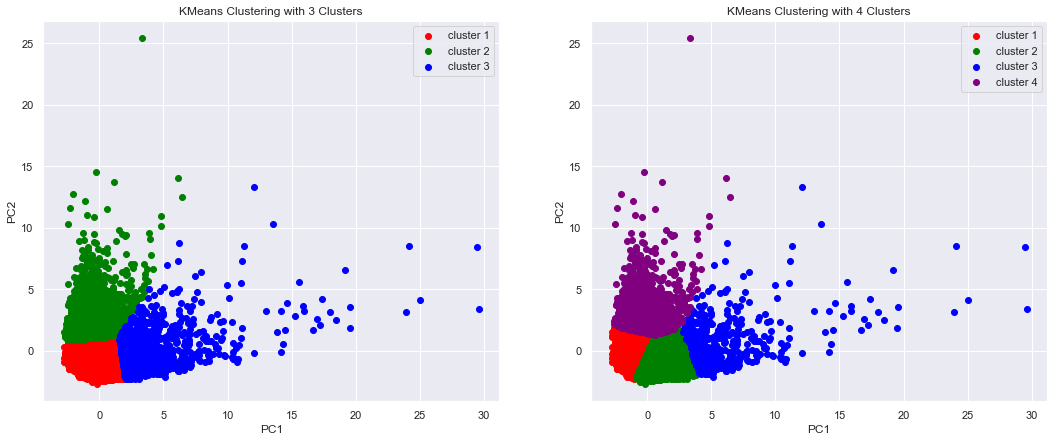

In [23]:

from scipy.stats import zscore
data_scaled=df.apply(zscore)
data_scaled.head()
data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_scaled))
preds = pd.Series(KMeans(n_clusters = 3,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

fig = plt.figure(figsize = (18, 7))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown']
plt.subplot(121)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3') 
plt.legend()
plt.title('KMeans Clustering with 3 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')


data_p = pd.DataFrame(PCA(n_components = 2).fit_transform(data_scaled))
preds = pd.Series(KMeans(n_clusters = 4,).fit_predict(data_p))
data_p = pd.concat([data_p, preds], axis =1)
data_p.columns = [0,1,'target']

plt.subplot(122)
plt.scatter(data_p[data_p['target']==0].iloc[:,0], data_p[data_p.target==0].iloc[:,1], c = colors[0], label = 'cluster 1')
plt.scatter(data_p[data_p['target']==1].iloc[:,0], data_p[data_p.target==1].iloc[:,1], c = colors[1], label = 'cluster 2')
plt.scatter(data_p[data_p['target']==2].iloc[:,0], data_p[data_p.target==2].iloc[:,1], c = colors[2], label = 'cluster 3')
plt.scatter(data_p[data_p['target']==3].iloc[:,0], data_p[data_p.target==3].iloc[:,1], c = colors[3], label = 'cluster 4')
plt.legend()
plt.title('KMeans Clustering with 4 Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')

alg = KMeans(n_clusters = 4)
label = alg.fit_predict(data_scaled)

# ********HIERARCHIAL CLUSTERING*****

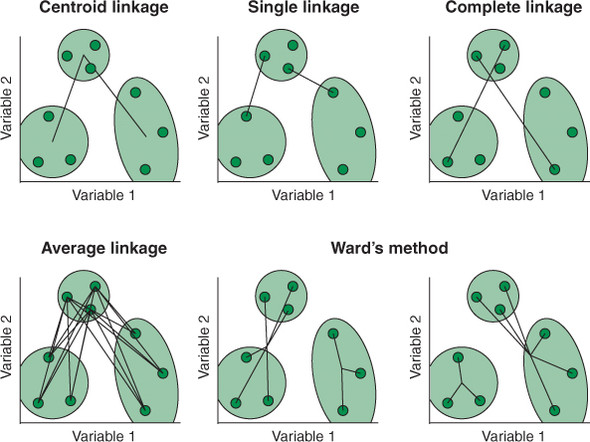

# WARD LINKAGE

In [40]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage

In [41]:
Z=linkage(data_scaled,method="ward")

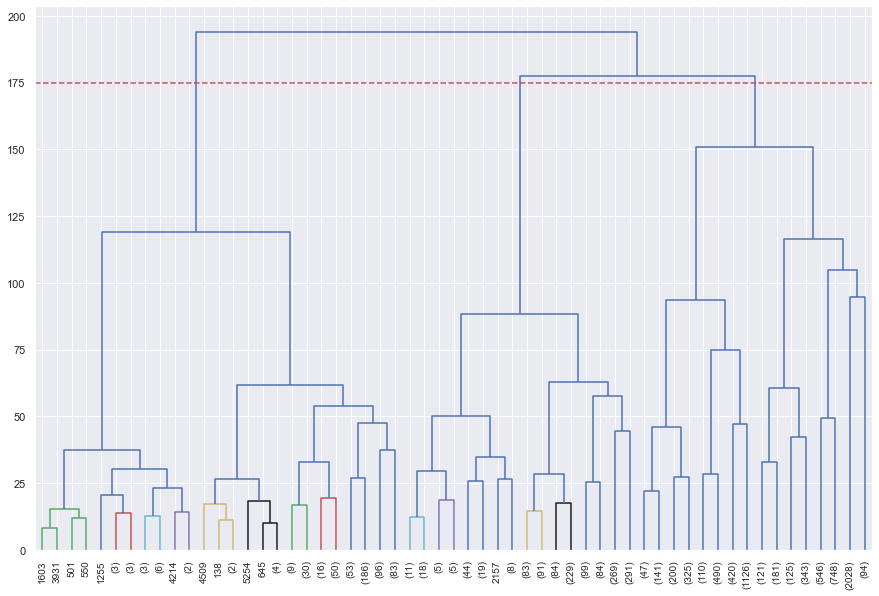

In [48]:
#making plot
plt.figure(figsize=(15,10))
dendrogram(Z,leaf_rotation=90,p=5,color_threshold=20,leaf_font_size=10,truncate_mode='level')
plt.axhline(y=175, color='r', linestyle='--')
plt.show()

If we draw a horizontal line that passes through longest distance without a horizontal line, It intersects 3 vertical lines
So, Optimal cluster =3

In [49]:
#euclidian distance for ward
model=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [50]:
#fitting on the model
model.fit(data_scaled)

AgglomerativeClustering(n_clusters=3)

In [52]:
data_p1 = pd.DataFrame(PCA(n_components = 2).fit_transform(data_scaled))
preds = pd.Series(KMeans(n_clusters = 3,).fit_predict(data_p1))
finalDfe_agg = pd.concat([data_p1, pd.DataFrame({'cluster':model.labels_})], axis = 1)


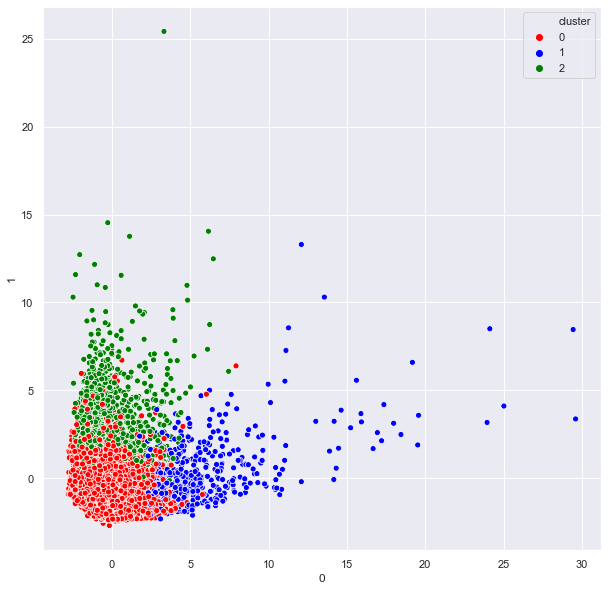

In [54]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x=0, y=1, hue="cluster", data=finalDfe_agg,palette=['red','blue','green'])
plt.show()

# AVERAGE LINKAGE

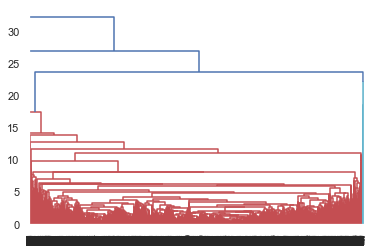

In [55]:
mergings = linkage(data_scaled, method = "average", metric='euclidean')
dendrogram(mergings)
plt.show()

# COMPLETE LINKAGE

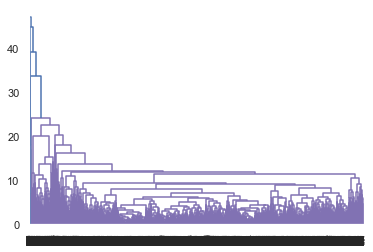

In [78]:
mergings = linkage(data_scaled, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

# -----------CLUSTER EDA:HOW TO ANALYSE CLUSTERING RESULTS------------------

In [56]:
# select best columns
best_cols = [ "PURCHASES", "CREDIT_LIMIT", "PAYMENTS"]


In [64]:
# create a 'cluster' column
data_final['cluster'] = label
best_cols.append('cluster')

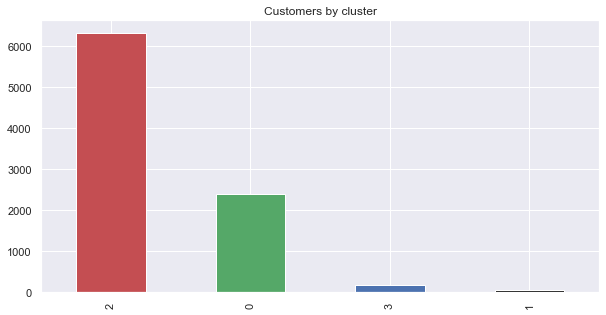

In [66]:
data_final['cluster'].value_counts().plot.bar(figsize=(10,5),color = list('rgbkymc'), title='Customers by cluster');




# ANALYSIS

# Cluster 0 (Blue)

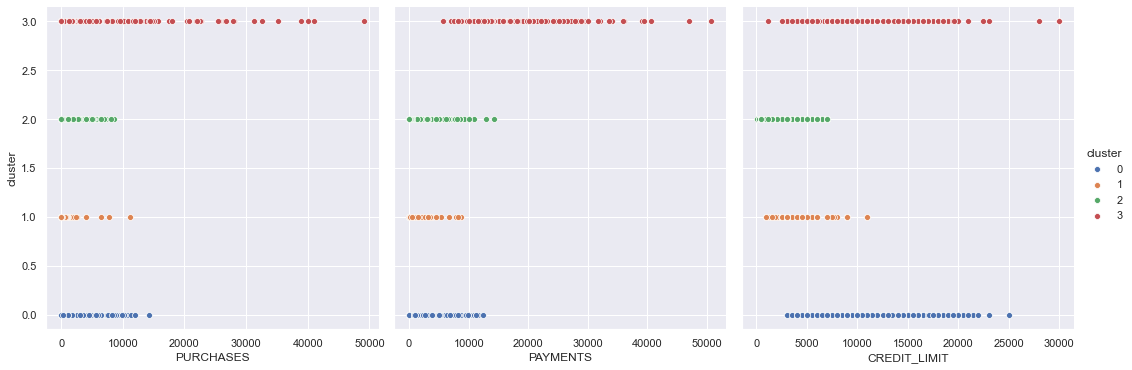

In [68]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'],
            y_vars=['cluster'],
            height=5, aspect=1)



 These people do not use credit card very much in their daily life. They have healthy finances and low debts. While encouraging these people to use credit cards more is necessary for the company's profit since they have highest average credit limit.There should be some sorts of strategy to attract these people more.

# Cluster 1 (Orange)

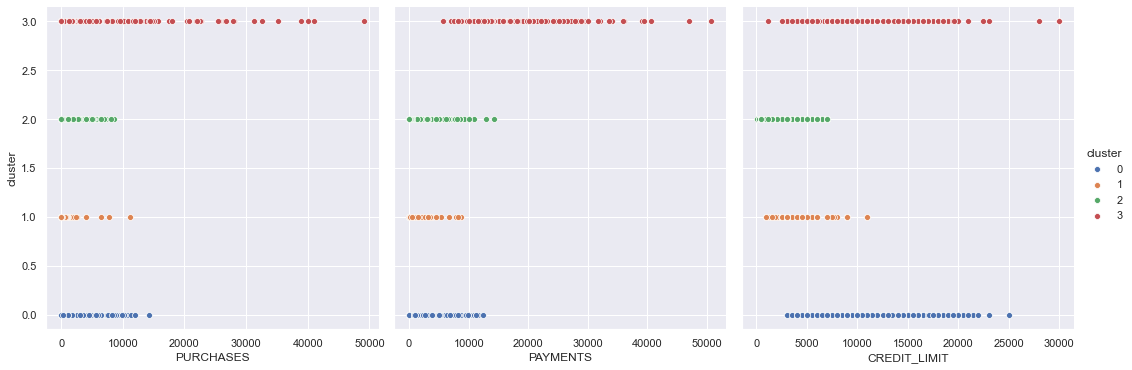

In [69]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'],
            y_vars=['cluster'],
            height=5, aspect=1)


This group of users is fairly frugal: they have second lowest purchases, lowest payments, and second lowest credit limit. The bank s not earning any profit from this cluster.



# Cluster 2 (Green):

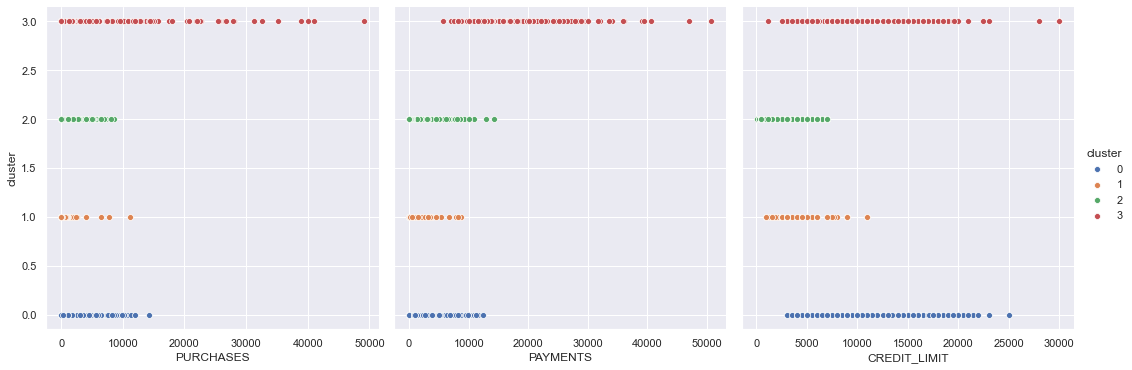

In [70]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'], y_vars=['cluster'],
            height=5, aspect=1)


They  have lowest credit limit.
Lowest credit limit suggests that the issuer has found some risk in giving money to these customers or their income is low.

# Cluster 3 (Red)

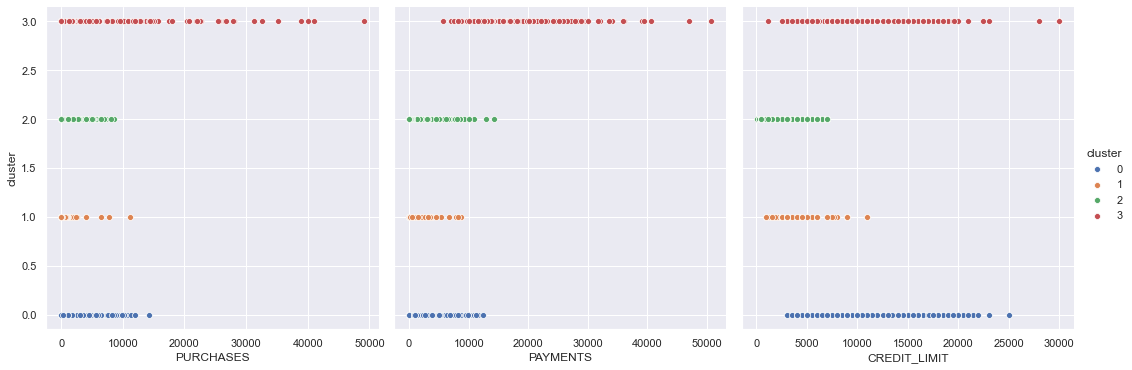

In [71]:
sns.pairplot(data_final[best_cols], hue='cluster', x_vars=['PURCHASES', 'PAYMENTS', 'CREDIT_LIMIT'], y_vars=['cluster'],
            height=5, aspect=1)

This group of people makes maximum purchases and maximum payments.They spend a lot of money using credit card,but also pay it.The bank is earning maximum profit from this cluster.

# PERFORMANCE SCORE :- 1 CALINSKI SCORE

It is also known as the Variance Ratio Criterion.
The score is defined as ratio between the within-cluster dispersion and the between-cluster dispersion.

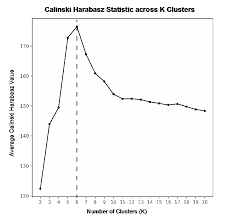
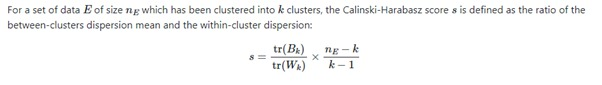

In [73]:
from sklearn.metrics import calinski_harabasz_score
klabels=kmeans.labels_s
calinski_harabasz_score(de,klabels)

697.0504801985084

Advantage over db score:-
The score is faster to compute.

# PERFORMANCE MEASURE 2:-DB SCORE

In [74]:
from sklearn.metrics import davies_bouldin_score 
# to store the cluster labels 
klabels = kmeans.labels_ 

db=davies_bouldin_score(df, klabels)


In [77]:
print(db)

0.2


INFERENCE:
Lower the DB index value, better is the clustering.
Lower values indicate tighter clusters that are better separated.

# THANK YOU